In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [465]:
import warnings
warnings.filterwarnings('ignore')

Taking the Model Selection Module as reference, Linear Regression gave an r2 score of 0.88 with MAE of 29 Lakhs, which was good. We will use Linear Regression for inference(and not for prediction task now)

In [466]:
data = pd.read_csv('flat_price_prediction_data.csv')
data

,sector,num_bedrooms,num_bathrooms,num_balconies,age_group,super_built_up_area,floor_number,servant_room,furnished,Centrally Air Conditioned,...,Club house / Community Center,Piped-gas,ac,geyser,fan,wardrobe,light,Low Density Society,total_num_rooms,price
0,sector 7,2,2.0,1.0,Moderately New Flat,1169.100000,4.0,0,0,0,...,0,0,0,0,3,1,4,0,5.0,0.45
1,sector 3,2,2.0,1.0,Old Flat,844.350000,1.0,0,1,0,...,0,0,0,1,4,3,3,0,5.0,0.50
2,sohna road,2,2.0,3.0,New Flat,772.905000,12.0,0,0,0,...,1,0,0,0,0,0,0,0,7.0,0.40
3,sector 61,2,2.0,2.0,Under Construction,1558.800000,2.0,0,0,0,...,1,0,0,0,0,0,0,0,7.0,1.47
4,sector 92,2,2.0,3.0,Under Construction,1345.000000,5.0,0,0,0,...,0,0,0,0,0,0,0,0,8.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,sector 28,2,2.0,2.0,Moderately Old Flat,1280.525333,1.0,0,0,0,...,0,0,0,0,0,0,0,0,6.0,1.35
2834,sector 86,3,3.0,3.0,Under Construction,1895.000000,9.0,1,0,0,...,0,0,0,0,0,0,0,0,10.0,1.05
2835,sector 48,5,5.0,4.0,Old Flat,3905.000000,4.0,1,0,0,...,1,0,0,0,0,0,0,0,15.0,3.30
2836,sector 108,3,3.0,3.0,Moderately New Flat,1822.000000,3.0,0,0,0,...,1,0,0,0,0,0,0,0,10.0,0.95


In [467]:
def yeo_johnson_transform(column_series):
    index_ = column_series.index
    data_2d = np.array(column_series).reshape(-1, 1)
    yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

    transformed_data = yeo_johnson_transformer.fit_transform(data_2d)
    transformed_data = pd.Series(transformed_data.flatten(), index=index_)
    return (yeo_johnson_transformer, transformed_data)

In [468]:
def inverse_transform(column_series, transformer):
    column_series = column_series.reshape(-1, 1)
    return transformer.inverse_transform(column_series)

In [469]:
def adjusted_r2_score(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))
    
    return adjusted_r2

In [470]:
X = data.drop(columns=['price'])
y = data['price']

In [471]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()

In [472]:
preprocessor = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), numerical_columns),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_columns)
    ], 
    remainder='passthrough'
)

In [473]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

In [475]:
transformer, y_train_transformed = yeo_johnson_transform(y_train)

In [476]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['num_bedrooms',
                                                   'num_bathrooms',
                                                   'num_balconies',
                                                   'super_built_up_area',
                                                   'floor_number',
                                                   'servant_room', 'furnished',
                                                   'Centrally Air Conditioned',
                                                   'False Ceiling Lighting',
                                                   'Intercom Facility',
                                                   'Private Garden / Terrace',
                                                   'Separate entry for servant '
                                                   'room',
                                                   'Spacious Interiors',
                                                   'Swimming Pool',
                                                   'Club house / Community '
                                                   'Center',
                                                   'Piped-gas', 'ac', 'geyser',
                                                   'fan', 'wardrobe', 'light',
                                                   'Low Density Society',
                                                   'total_num_rooms']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  Index(['sector', 'age_group'], dtype='object'))])),
                ('model', LinearRegression())])

In [477]:
y_pred = pipe.predict(X_test)

y_pred = inverse_transform(y_pred, transformer).ravel()
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [478]:
print(f'r2 score : {r2}')
print(f'MAE : {mae}')

r2 score : 0.8629715212207228
MAE : 0.2784862111154129


Checking if adjusted r2 score comes out to be similar or not, if not then there are redundant features in data

In [479]:
num_features = X.shape[1]

adj_r2_score = adjusted_r2_score(y_test, y_pred, num_features)
print(f'adjusted r2 score: {adj_r2_score}')

adjusted r2 score: 0.8566510194320108


So, it is similar to r2 score, so there isn't much redundant features

# Checking Assumptions of Linear Regression

We need to check assumptions of Linear Regression first, because if the assumptions are not met then the statsmodel results and the linear regression coefficients won't be trustable for inference.

### 1) X and y are Linearly related

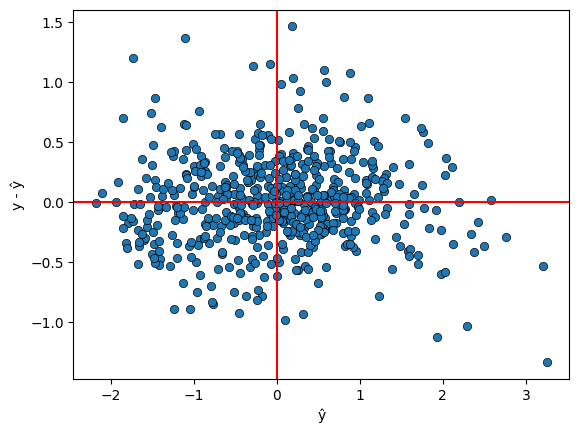

In [480]:
residual = y_test - y_pred # ŷ
# scatterplot of (y - ŷ) v/s ŷ must be randomly scattered across 0(no pattern)
sns.scatterplot(x=y_pred, y=residual, edgecolor='black')
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')
plt.xlabel('ŷ')
plt.ylabel('y - ŷ')
plt.show()

So, X and y are linearly related (Assumption 1✅)

### 2) Residual is normally distributed

- (y - ŷ) ∼ N(0, constant)
- But, if n_rows > 200, then central limit theorem makes sure that this is true

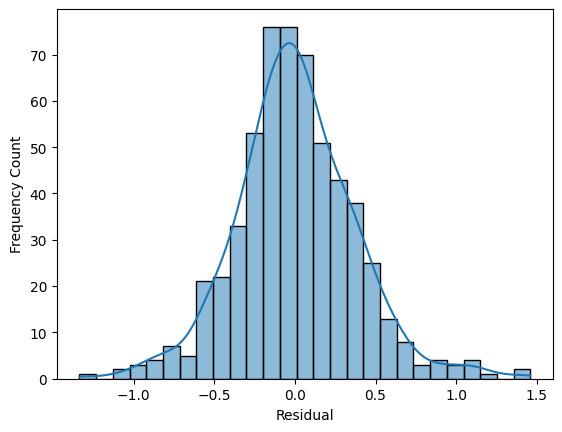

In [481]:
# Still checking if normal about 0

sns.histplot(x=residual, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency Count')
plt.show()

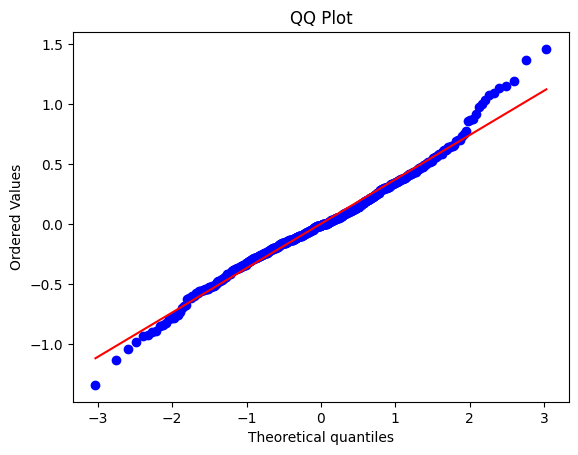

In [482]:
# QQ Plot method

from scipy.stats import probplot

probplot(residual, plot=plt)
plt.title('QQ Plot')
plt.show()

In [483]:
# Omnibus test

from scipy.stats import normaltest
_, p_value = normaltest(residual)

print(f'p value: {p_value}')
# Since, p_value is < α, so failed to reject Null Hypothesism hence population residual is 'not' normally distributed

p value: 1.089615670243509e-05


So, we can conclude that the residual is normally distributed (Assumption 2✅).

### 3) Homoscedasticity

In [484]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_transformed = preprocessor.fit_transform(X).toarray()
X_transformed = sm.add_constant(X_transformed)
model = sm.OLS(y_transformed, X_transformed)
results = model.fit()

# Perform the Breusch-Pagan test for homoscedasticity
_, p_value, _, _ = het_breuschpagan(results.resid, X_transformed[:, 1:])
print("Breusch-Pagan Test p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis. Homoscedasticity is not violated.")
else:
    print("Reject the null hypothesis. Homoscedasticity may be violated.")

Breusch-Pagan Test p-value: 6.282834699517545e-150
Reject the null hypothesis. Homoscedasticity may be violated.


So, Homoscedasticity is violated (Assumption 3❌), we may use Weighted Least Squares (WLS).

### 4) No autocorrelation

- Data of 1 flat maybe related to another flat(builder maybe same), so maybe there is autocorrelation.

In [485]:
import statsmodels.api as sm

# 1.5 < d < 2.5 means no auto-correlation
durbin_watson_statistic = sm.stats.durbin_watson(residual)
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 1.9408713577630763


So, we can conclude that there is no autocorrelation (Assumption 4✅).

### 5) Multicollinearity

In [486]:
# Condition Number

mat = np.dot(X_transformed.T, X_transformed)
condition_number = np.linalg.cond(mat)
print(condition_number)

1202831.5147669234


So, this suggests high multicollinearity in X (Assumption 5❌)

In [487]:
# We identify which of the feature can be obtained as a linear combination of other features
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

X_transformed = preprocessor.fit_transform(X).toarray()
columns = preprocessor.get_feature_names_out()
transformed_data = pd.DataFrame(X_transformed, columns=columns)
vif_results = calculate_vif(transformed_data)

In [488]:
vif_results = vif_results.reset_index()

In [489]:
vif_results[vif_results['VIF'] > 10]['Variable'].tolist()

['standardize__total_num_rooms']

Reason for multicollinearity:
- Also standardize__total_num_rooms and standardize__super_built_up_area are highly correlated clearly

In [490]:
transformed_data.drop(columns=['standardize__total_num_rooms'], inplace=True)

In [491]:
X_transformed = transformed_data.values
mat = np.dot(X_transformed.T, X_transformed)
condition_number = np.linalg.cond(mat)
print(condition_number)

21719.66639144449


In [492]:
# Still high
columns = columns.tolist()
columns.remove('standardize__total_num_rooms')

transformed_data = pd.DataFrame(X_transformed, columns=columns)
vif_results = calculate_vif(transformed_data)
vif_results[vif_results['VIF'] > 5]['Variable'].tolist()

['standardize__Swimming Pool', 'standardize__Club house / Community Center']

In [493]:
transformed_data.drop(columns=['standardize__Club house / Community Center'], inplace=True)

In [494]:
vif_results = calculate_vif(transformed_data)
vif_results[vif_results['VIF'] > 5]['Variable'].tolist()

[]

# StatsModel Summary

- F-test is passed(with very high confidence), hence atleast one of the feature is linearly dependent to output variable.
- R-squared is approx 0.9 so 90% of total variance in y is being explained by linear regression model being fit.
- It suggests of strong multicollinearity.

In [495]:
transformed_data = sm.add_constant(transformed_data)

ols_model = sm.OLS(y_transformed, transformed_data)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:37:40   Log-Likelihood:                -995.83
No. Observations:                2838   AIC:                             2252.
Df Residuals:                    2708   BIC:                             3025.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

It tells of strong multicollinearity

In [496]:
vif_results[vif_results['VIF'] > 3]['Variable'].tolist()

['standardize__num_bedrooms',
 'standardize__num_bathrooms',
 'standardize__super_built_up_area',
 'standardize__furnished',
 'standardize__fan']

In [497]:
transformed_data.drop(columns=['standardize__num_bathrooms', 'standardize__furnished', 'standardize__num_balconies', 'standardize__fan'], inplace=True)

In [498]:
transformed_data = sm.add_constant(transformed_data)

ols_model = sm.OLS(y_transformed, transformed_data)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     154.8
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:37:40   Log-Likelihood:                -1052.6
No. Observations:                2838   AIC:                             2357.
Df Residuals:                    2712   BIC:                             3107.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [499]:
transformed_data

,const,standardize__num_bedrooms,standardize__super_built_up_area,standardize__floor_number,standardize__servant_room,standardize__Centrally Air Conditioned,standardize__False Ceiling Lighting,standardize__Intercom Facility,standardize__Private Garden / Terrace,standardize__Separate entry for servant room,...,ohe__sector_sector 92,ohe__sector_sector 93,ohe__sector_sector 95,ohe__sector_sector 99,ohe__sector_shanti nagar,ohe__sector_sohna road,ohe__age_group_Moderately Old Flat,ohe__age_group_New Flat,ohe__age_group_Old Flat,ohe__age_group_Under Construction
0,1.0,-1.028021,-0.836251,-0.632787,-0.712158,-0.446079,-0.535794,-1.522924,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.028021,-1.225716,-1.118764,-0.712158,-0.446079,-0.535794,-1.522924,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-1.028021,-1.311398,0.663153,-0.712158,-0.446079,-0.535794,0.656631,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,-1.028021,-0.368893,-0.956772,-0.712158,-0.446079,1.866390,-1.522924,2.261941,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,-1.028021,-0.625298,-0.470794,-0.712158,-0.446079,-0.535794,-1.522924,-0.442098,-0.617814,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,1.0,-1.028021,-0.702621,-1.118764,-0.712158,-0.446079,-0.535794,-1.522924,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2834,1.0,0.266929,0.034304,0.177176,1.404182,-0.446079,-0.535794,-1.522924,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2835,1.0,2.856829,2.444849,-0.632787,1.404182,-0.446079,-0.535794,-1.522924,2.261941,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2836,1.0,0.266929,-0.053243,-0.794779,-0.712158,-0.446079,-0.535794,0.656631,-0.442098,-0.617814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [517]:
transformed_data.drop(columns=['const'], inplace=True)

In [518]:
lin_reg = LinearRegression()
lin_reg.fit(transformed_data, y_transformed)

LinearRegression()

In [519]:
standardized_coeficients = pd.Series(lin_reg.coef_, index=transformed_data.columns)

In [520]:
standardized_coeficients

standardize__num_bedrooms                 0.183090
standardize__super_built_up_area          0.456864
standardize__floor_number                 0.068187
standardize__servant_room                 0.039915
standardize__Centrally Air Conditioned    0.021340
                                            ...   
ohe__sector_sohna road                   -1.058674
ohe__age_group_Moderately Old Flat       -0.063159
ohe__age_group_New Flat                   0.050080
ohe__age_group_Old Flat                  -0.111338
ohe__age_group_Under Construction         0.161785
Length: 125, dtype: float64

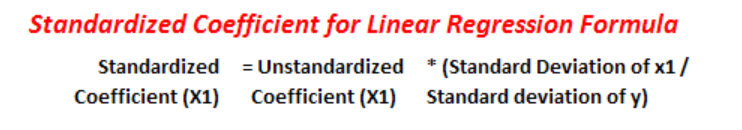

In [530]:
standard_deviation_y = y_transformed.std() # y is yeo johnson transformed
standard_deviation_X = transformed_data.std()

# The below will be the change in yeo johnson y if xi is changed by 1 unit
unstandardized_coefficients = (standardized_coeficients * standard_deviation_y) / standard_deviation_X
# Converting to original unit
original_indexes = unstandardized_coefficients.index
unstandardized_coefficients = pd.Series(transformer.inverse_transform(unstandardized_coefficients.values.reshape(-1, 1)).flatten())
unstandardized_coefficients.index = original_indexes

In [532]:
pd.set_option('display.max_rows', None)

In [534]:
unstandardized_coefficients.sort_values(ascending=False)

ohe__sector_sector 128                          47.574494
ohe__sector_sector 32                           19.663950
ohe__sector_sector 41                           19.263418
ohe__sector_golf course road                    17.535818
ohe__sector_sector 53                           13.857912
ohe__sector_sector 58                           13.107225
ohe__sector_sector 24                           11.114279
ohe__sector_sector 59                            7.951800
ohe__sector_bptp                                 7.660337
ohe__sector_sector 31                            6.926225
ohe__sector_sector 54                            5.975048
ohe__sector_sector 22                            5.506110
ohe__sector_sector 43                            5.479536
ohe__sector_sector 29                            5.455278
ohe__sector_sector 60                            5.002117
ohe__sector_sector 62                            4.778177
ohe__sector_sector 28                            3.759773
ohe__sector_se

In [537]:
# The sector information doesn't seem trustable, trying target encoding

import category_encoders as ce

preprocessor = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), numerical_columns),
        ('target', ce.TargetEncoder(), categorical_columns)
    ], 
    remainder='passthrough'
)

In [540]:
X_transformed = preprocessor.fit_transform(X, y_transformed)
columns = preprocessor.get_feature_names_out()
transformed_data = pd.DataFrame(X_transformed, columns=columns)
vif_results = calculate_vif(transformed_data)
vif_results = vif_results.reset_index()
vif_results[vif_results['VIF'] > 5]['Variable'].tolist()

['standardize__num_bedrooms',
 'standardize__num_bathrooms',
 'standardize__Swimming Pool',
 'standardize__Club house / Community Center',
 'standardize__total_num_rooms']

In [542]:
transformed_data = transformed_data.drop(columns=['standardize__num_bathrooms', 'standardize__Club house / Community Center', 'standardize__total_num_rooms'])

- Condition number is below 30, indicating no multicollinearity
- Results are the same, except r2 score(not important for inference unless not too low)


Columns which don't seem to be linearly related to output are(from t test p_values): standardize__servant_room, standardize__furnished, standardize__False Ceiling Lighting, standardize__Spacious Interiors, standardize__Piped-gas, standardize__fan, standardize__wardrobe, standardize__light, standardize__Low Density Society, target__age_group

In [543]:
transformed_data = sm.add_constant(transformed_data)

ols_model = sm.OLS(y_transformed, transformed_data)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     608.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:10:32   Log-Likelihood:                -1543.6
No. Observations:                2838   AIC:                             3133.
Df Residuals:                    2815   BIC:                             3270.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [544]:
feature_names = [
    'standardize__servant_room',
    'standardize__furnished',
    'standardize__False Ceiling Lighting',
    'standardize__Spacious Interiors',
    'standardize__Piped-gas',
    'standardize__fan',
    'standardize__wardrobe',
    'standardize__light',
    'standardize__Low Density Society',
    'target__age_group'
]
transformed_data = transformed_data.drop(columns=feature_names)

In [545]:
ols_model = sm.OLS(y_transformed, transformed_data)
ols_results = ols_model.fit()

print(ols_results.summary()) # So r2 score stays similar, so we can drop these columns

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1111.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:16:25   Log-Likelihood:                -1552.5
No. Observations:                2838   AIC:                             3131.
Df Residuals:                    2825   BIC:                             3208.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [549]:
transformed_data.drop(columns=['const'], inplace=True)

In [550]:
lin_reg = LinearRegression()
lin_reg.fit(transformed_data, y_transformed)
standardized_coeficients = pd.Series(lin_reg.coef_, index=transformed_data.columns)

In [551]:
standard_deviation_y = y_transformed.std() # y is yeo johnson transformed
standard_deviation_X = transformed_data.std()

# The below will be the change in yeo johnson y if xi is changed by 1 unit
unstandardized_coefficients = (standardized_coeficients * standard_deviation_y) / standard_deviation_X
# Converting to original unit
original_indexes = unstandardized_coefficients.index
unstandardized_coefficients = pd.Series(transformer.inverse_transform(unstandardized_coefficients.values.reshape(-1, 1)).flatten())
unstandardized_coefficients.index = original_indexes

In [552]:
unstandardized_coefficients

standardize__num_bedrooms                       0.114232
standardize__num_balconies                      0.063594
standardize__super_built_up_area                0.457292
standardize__floor_number                       0.062142
standardize__Centrally Air Conditioned          0.023440
standardize__Intercom Facility                  0.020077
standardize__Private Garden / Terrace          -0.027966
standardize__Separate entry for servant room   -0.037537
standardize__Swimming Pool                      0.048130
standardize__ac                                 0.044977
standardize__geyser                             0.034050
target__sector                                  1.185043
dtype: float64